# Data Exploration

In [1]:
import pandas as pd 

In [28]:
df_bookings= pd.read_csv("datasets/fact_bookings.csv")
df_date=pd.read_csv("datasets/dim_date.csv")
df_hotels=pd.read_csv("datasets/dim_hotels.csv")
df_rooms=pd.read_csv("datasets/dim_rooms.csv")
df_aggregated_bookings=pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [5]:
df_bookings.shape

(134590, 12)

In [8]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [9]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [10]:
df_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

<Axes: xlabel='booking_platform'>

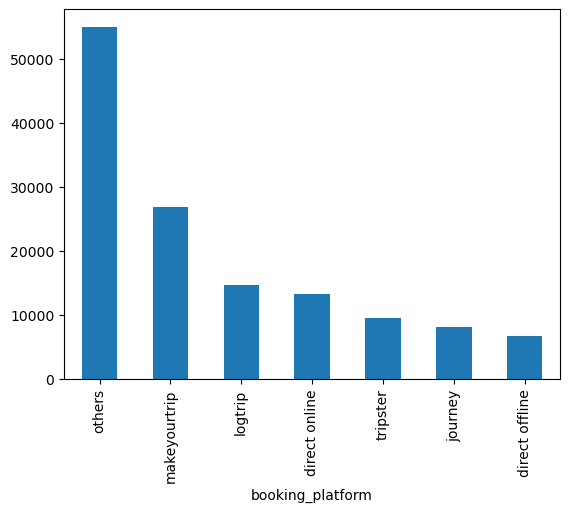

In [14]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

In [15]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [19]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [30]:
df_hotels.shape

(25, 4)

In [31]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [32]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

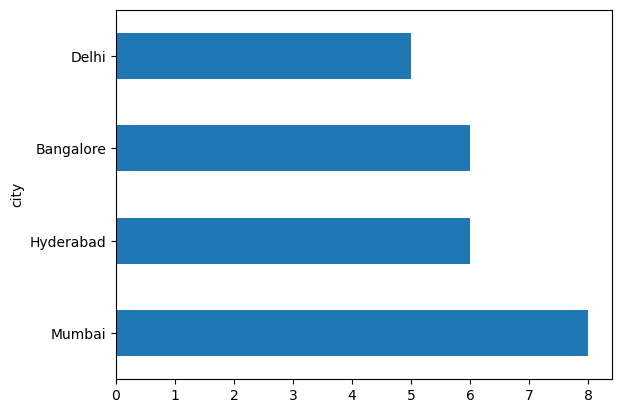

In [35]:
df_hotels.city.value_counts().plot(kind='barh')

In [39]:
df_aggregated_bookings.shape

(9200, 5)

In [41]:
df_aggregated_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0


In [43]:
df_aggregated_bookings.room_category.value_counts()

room_category
RT1    2300
RT2    2300
RT3    2300
RT4    2300
Name: count, dtype: int64

In [46]:
df_aggregated_bookings.property_id.value_counts()

property_id
16559    368
17559    368
17564    368
19561    368
19559    368
18563    368
18562    368
18561    368
18559    368
18558    368
17563    368
17562    368
16563    368
19562    368
16562    368
16561    368
16560    368
17561    368
19560    368
19558    368
17560    368
16558    368
17558    368
19563    368
18560    368
Name: count, dtype: int64

In [57]:
df_aggregated_bookings[df_aggregated_bookings.capacity < df_aggregated_bookings.successful_bookings]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [58]:
df_aggregated_bookings.capacity.max()

50.0

In [59]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


# DATA CLEANING

In [60]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [63]:
#Ignoring these records because these were insignificant considering 134k rows of data we had 
df_bookings=df_bookings[df_bookings.no_guests>0]

In [64]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [74]:
mean,std= df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std() 
max_outlier_limit=mean+3*std
min_outlier_limit=mean-3*std

In [84]:
df_bookings=df_bookings[(df_bookings.revenue_generated< max_outlier_limit) & (df_bookings.revenue_generated>min_outlier_limit)]
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,133054.000000,133054.000000,56010.000000,133054.000000,133054.000000
mean,18067.762645,2.010853,3.617158,14648.580013,12468.802749
std,1093.722004,1.000854,1.234388,5971.405240,6537.725429
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,18558.000000,2.000000,4.000000,13500.000000,11400.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,34200.000000,34200.000000


In [85]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77044
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [88]:
df_aggregated_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0


In [89]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [92]:
df_aggregated_bookings[df_aggregated_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [93]:
df_aggregated_bookings.shape

(9200, 5)

In [94]:
df_aggregated_bookings=df_aggregated_bookings[df_aggregated_bookings.capacity.isnull()==False]

In [97]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

# DATA TRANSFORMATION

In [137]:
df_aggregated_bookings["occupancy_rate"]= df_aggregated_bookings.successful_bookings / df_aggregated_bookings.capacity
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [139]:
df_aggregated_bookings.occupancy_rate= df_aggregated_bookings.occupancy_rate.apply(lambda x: round(x*100, 2))
df_aggregated_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33


# INSIGHT GENERATION

**Occupancy by room type**

In [141]:
df_aggregated_bookings.groupby('room_category')['occupancy_rate'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occupancy_rate, dtype: float64

In [144]:
df_occupancy_insight=pd.merge(df_aggregated_bookings,df_rooms, left_on="room_category", right_on="room_id")
df_occupancy_insight.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard


In [145]:
df_occupancy_insight.groupby('room_class')['occupancy_rate'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occupancy_rate, dtype: float64

**Occupancy Per City**

In [149]:
df_hotels.head(1)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi


In [151]:
df_OccupancyByCity= pd.merge(df_aggregated_bookings, df_hotels, on= 'property_id')

<Axes: xlabel='city'>

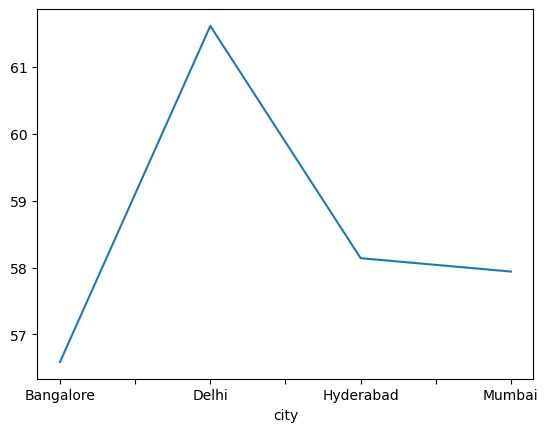

In [159]:
df_OccupancyByCity.groupby('city')['occupancy_rate'].mean().round(2).plot(kind="line")

**Occupancy- Weekends VS Weekdays**

In [165]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [172]:
df_OccupancyByDay=pd.merge(df_aggregated_bookings, df_date , left_on='check_in_date', right_on='date') 
df_OccupancyByDay.head(1)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May 22,W 20,weekeday


In [173]:
df_OccupancyByDay.groupby('day_type')['occupancy_rate'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occupancy_rate, dtype: float64

**Occupancy in the Month of June**

In [182]:
df_june=df_OccupancyByDay[(df_OccupancyByDay['mmm yy'])=='Jun 22']
df_june.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,10-Jun-22,Jun 22,W 24,weekeday


In [185]:
df_june.occupancy_rate.mean().round(2)

58.79

In [188]:
df_june.groupby('room_category')['occupancy_rate'].mean().round(2)

room_category
RT1    58.19
RT2    58.64
RT3    58.74
RT4    59.58
Name: occupancy_rate, dtype: float64